<a href="https://colab.research.google.com/github/Abhishekmishra-04/Natural-Language-Using-NLP/blob/main/Language_Detection_Using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import warnings
warnings.simplefilter("ignore")

In [3]:
# Loading the dataset
data = pd.read_csv("/content/Language Detection.csv")

In [4]:
data.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [5]:
# value count for each language
data["Language"].value_counts()

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

In [6]:
# separating the independent and dependant features
X = data["Text"]
y = data["Language"]

In [7]:
# converting categorical variables to numerical

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
#Text Processing
data_list = []
for text in X:
    text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    data_list.append(text)

In [9]:
#Bag Of Words
# creating bag of words using countvectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()

In [10]:
X.shape

(10337, 39404)

In [11]:
#Train Test Split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [12]:
#Model Creation And Prediction
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [13]:
# prediction
y_pred = model.predict(x_test)

In [14]:
#Prediction
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [15]:
print("Accuracy is :",ac)

Accuracy is : 0.9830754352030948


In [16]:
# classification report
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       101
           1       1.00      0.94      0.97        81
           2       1.00      1.00      1.00       104
           3       0.92      1.00      0.96       298
           4       0.99      0.99      0.99       195
           5       1.00      1.00      1.00        96
           6       1.00      0.99      0.99        69
           7       1.00      1.00      1.00        10
           8       0.99      0.98      0.99       116
           9       1.00      0.93      0.96        71
          10       0.96      1.00      0.98       105
          11       0.99      0.99      0.99       153
          12       1.00      0.99      0.99       145
          13       0.99      0.98      0.99       176
          14       0.98      0.98      0.98       130
          15       1.00      0.98      0.99       109
          16       1.00      0.94      0.97       109

    accuracy              

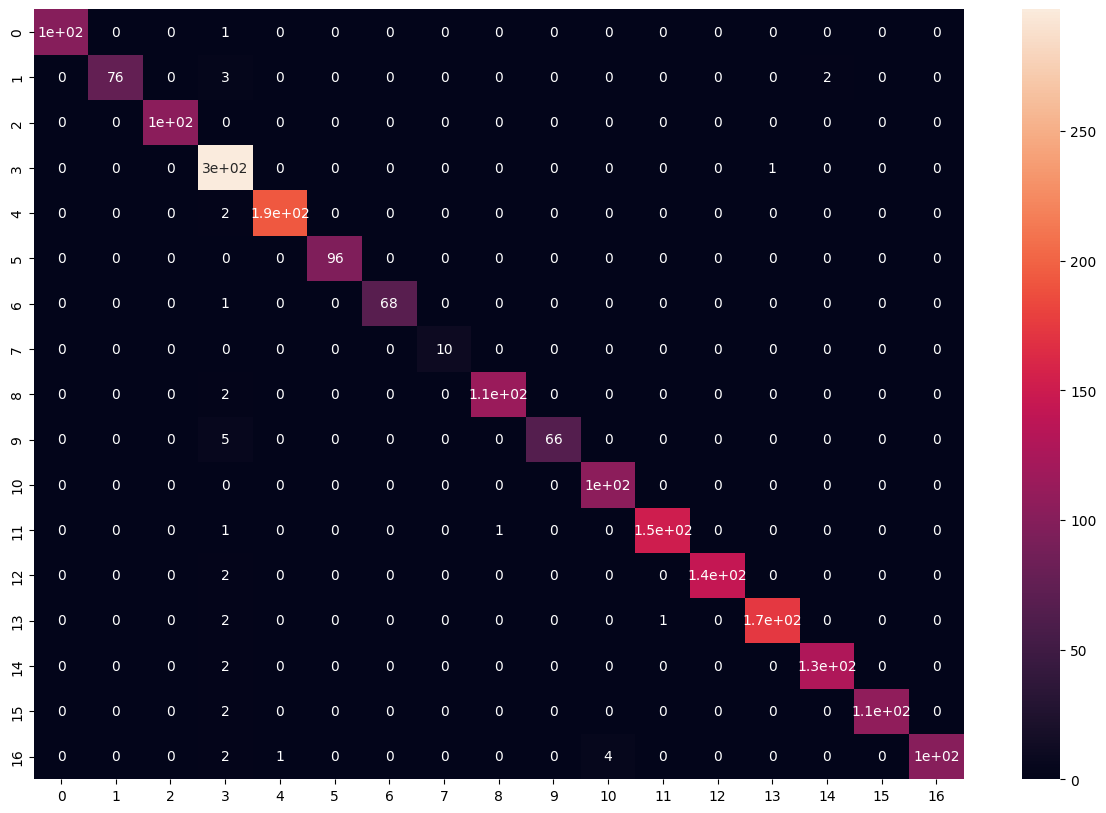

In [17]:
# visualising the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()